# Exploratory Data Analysis With Python

### Source: https://github.com/endlessnoc/Project/blob/main/Stock%20Price%20Prediction%20Project/Stock%20Price%20Prediction%20Project%20Utilizing%20LSTM.ipynb 

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

import warnings
warnings.filterwarnings('ignore')

In [2]:
Company = input("Stock Symbol: ")
Start_Date = input("Start(YYYY-MM-DD):")
End_Date = input("End(YYYY-MM-DD):")

Stock Symbol: AAPL
Start(YYYY-MM-DD):2010-01-01
End(YYYY-MM-DD):2023-05-15


In [3]:
Stock_Price = yf.download(Company,Start_Date,End_Date)
Stock_Price

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800
...,...,...,...,...,...,...
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.026688,55962800
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.301422,45326900
2023-05-10,173.020004,174.029999,171.899994,173.559998,173.086533,53724500


In [4]:
Stock_Price = Stock_Price.reset_index()
Stock_Price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800
...,...,...,...,...,...,...,...
3358,2023-05-08,172.479996,173.850006,172.110001,173.500000,173.026688,55962800
3359,2023-05-09,173.050003,173.539993,171.600006,171.770004,171.301422,45326900
3360,2023-05-10,173.020004,174.029999,171.899994,173.559998,173.086533,53724500
3361,2023-05-11,173.850006,174.589996,172.169998,173.750000,173.276016,49514700


# Part A: Data Scrubbing

## Step A.1: Look at Each Column's Dtypes

In [5]:
Stock_Price.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

### All Columns are Either Float or Integer Types

## Step A.2: Monitor Null Values

In [6]:
Stock_Price.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### No Null Values Exist

# Part B: Exploratory Data Analysis

## Step B.1: Stock Price

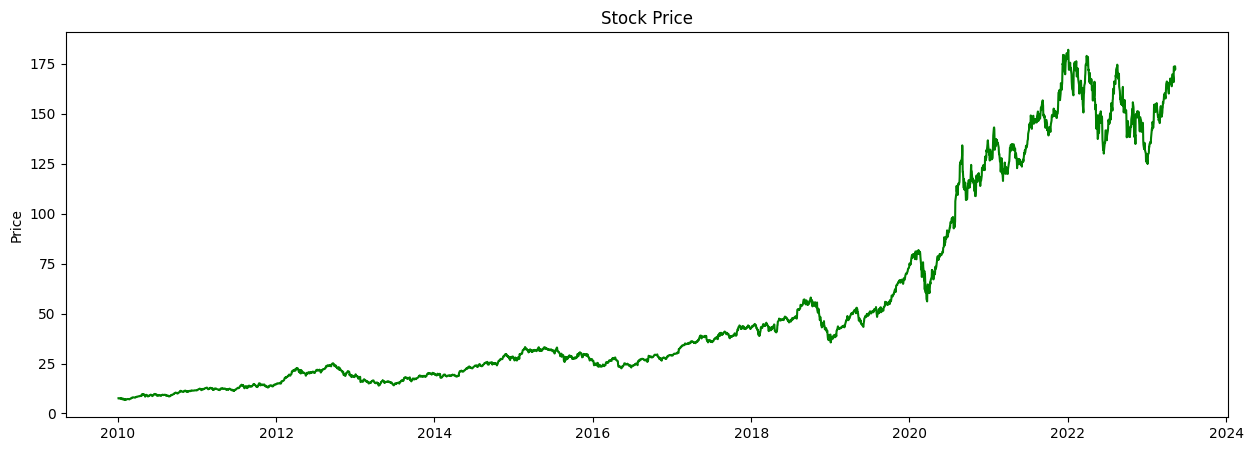

In [7]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(Stock_Price.Date,Stock_Price.Close, color='Green')

ax.set_ylabel('Price')
plt.title('Stock Price')

plt.show()

### The Stock Price is continuously changing.

## Step B.2: Moving Average

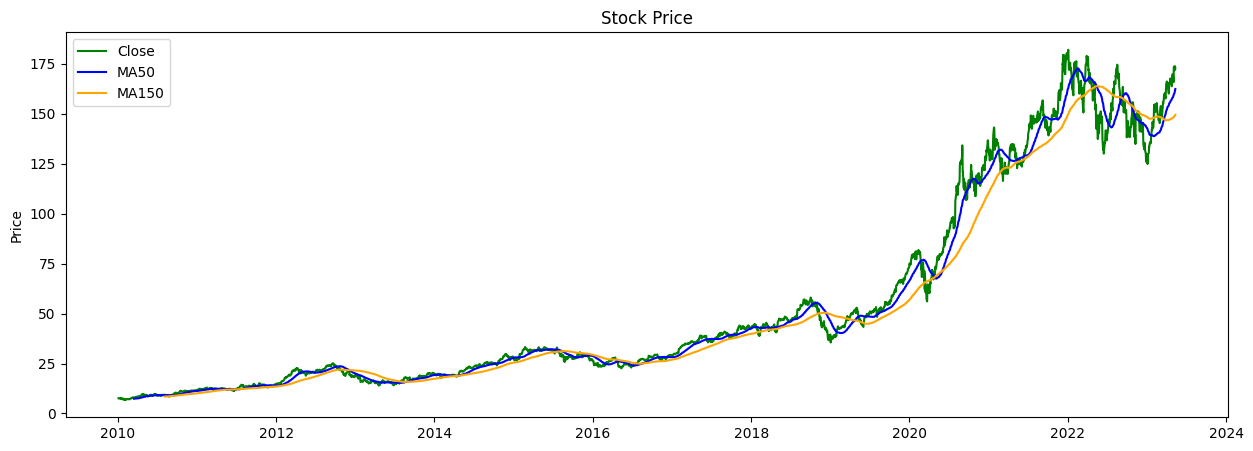

In [8]:
MA50 = Stock_Price.Close.rolling(50).mean()
MA150 = Stock_Price.Close.rolling(150).mean()

fig,ax = plt.subplots(figsize=(15,5))
ax.plot(Stock_Price.Date,Stock_Price.Close, color='Green',label='Close')
ax.plot(Stock_Price.Date,MA50, color='Blue', label='MA50')
ax.plot(Stock_Price.Date,MA150, color='Orange', label = 'MA150')

ax.set_ylabel('Price')
plt.title('Stock Price')

plt.legend()
plt.show()

### By increasing the number to calculate moving averages, the smooother the Price trend gets.

## Step B.3: Volume

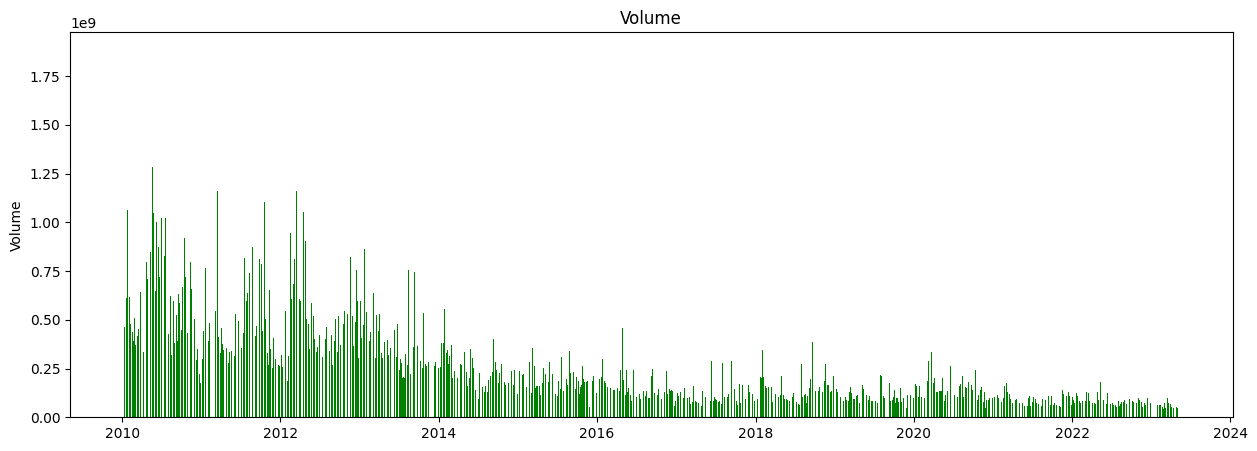

In [9]:
fig,ax = plt.subplots(figsize=(15,5))
ax.bar(Stock_Price.Date,Stock_Price.Volume, color='Green')

ax.set_ylabel('Volume')
plt.title('Volume')

plt.show()

### The Volume Chart is steadily changing, but not significantly.

## Step B.4: Daily Return

In [10]:
Stock_Price['Daily Return'] = Stock_Price['Close'].pct_change(1)
Stock_Price

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600,NaN
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800,0.001729
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000,-0.015906
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200,-0.001849
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800,0.006648
...,...,...,...,...,...,...,...,...
3358,2023-05-08,172.479996,173.850006,172.110001,173.500000,173.026688,55962800,-0.000403
3359,2023-05-09,173.050003,173.539993,171.600006,171.770004,171.301422,45326900,-0.009971
3360,2023-05-10,173.020004,174.029999,171.899994,173.559998,173.086533,53724500,0.010421
3361,2023-05-11,173.850006,174.589996,172.169998,173.750000,173.276016,49514700,0.001095


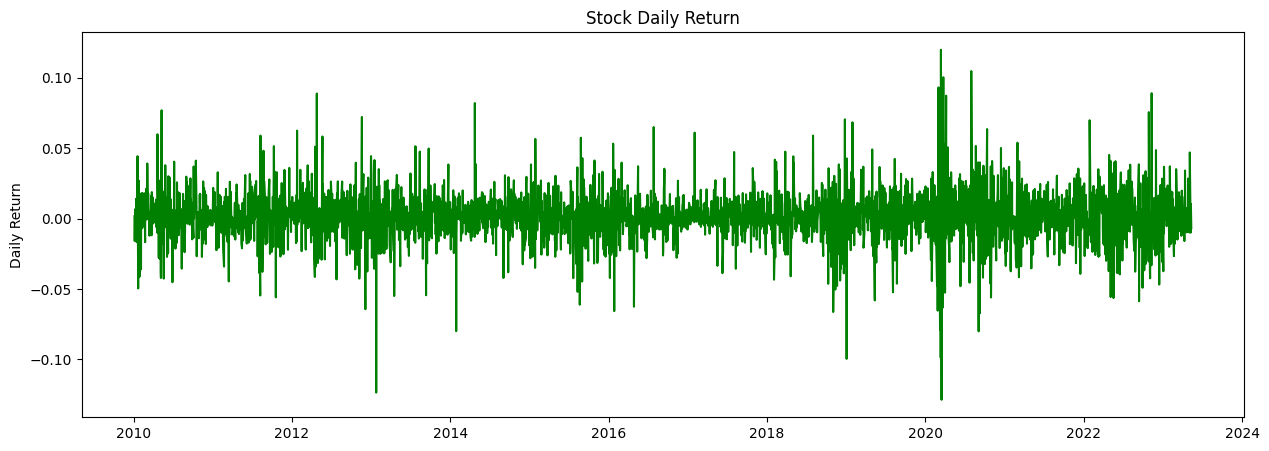

In [11]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(Stock_Price.Date,Stock_Price['Daily Return'], color='Green')

ax.set_ylabel('Daily Return')
plt.title('Stock Daily Return')

plt.show()

<Axes: >

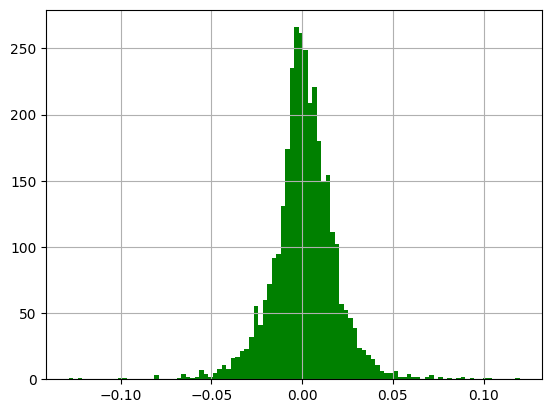

In [12]:
Stock_Price['Daily Return'].hist(bins=100,color='Green')

### The Daily Return isn't too big of a difference for a daily basis, but there are some dates that have definite outliers.

## Step B.5: Cumulative Return

In [13]:
Stock_Price['Cumulative Return'] = (1 + Stock_Price['Daily Return']).cumprod()
Stock_Price

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Cumulative Return
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600,NaN,NaN
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800,0.001729,1.001729
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000,-0.015906,0.985795
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200,-0.001849,0.983973
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800,0.006648,0.990514
...,...,...,...,...,...,...,...,...,...
3358,2023-05-08,172.479996,173.850006,172.110001,173.500000,173.026688,55962800,-0.000403,22.699874
3359,2023-05-09,173.050003,173.539993,171.600006,171.770004,171.301422,45326900,-0.009971,22.473530
3360,2023-05-10,173.020004,174.029999,171.899994,173.559998,173.086533,53724500,0.010421,22.707724
3361,2023-05-11,173.850006,174.589996,172.169998,173.750000,173.276016,49514700,0.001095,22.732583


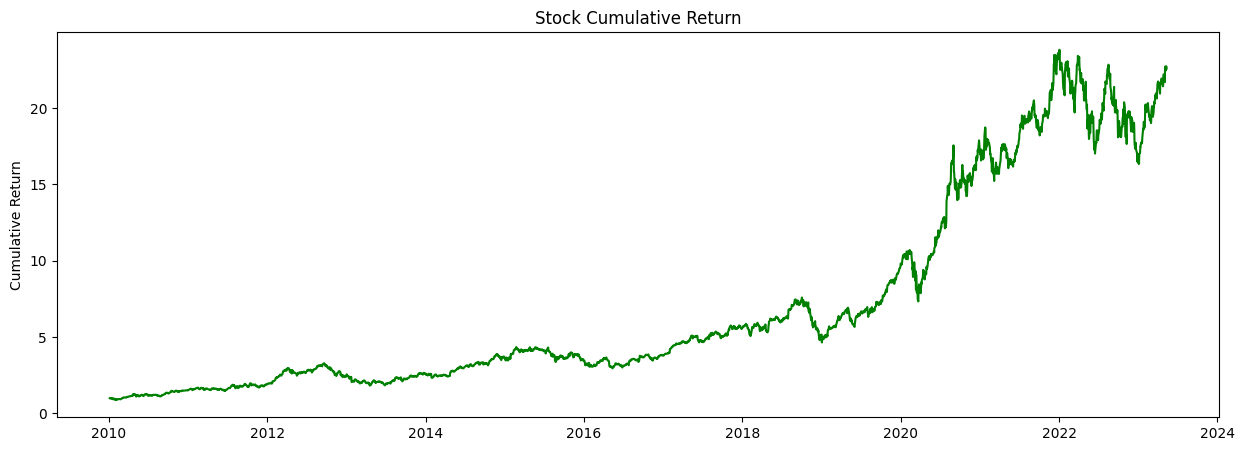

In [14]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(Stock_Price.Date,Stock_Price['Cumulative Return'], color='Green')

ax.set_ylabel('Cumulative Return')
plt.title('Stock Cumulative Return')

plt.show()

### The Cumulative Return is definitely showing a positive trend growth from 2010 to 2023